# OxCOVID19 (https://covid19.eng.ox.ac.uk/) - Confirmed and deaths


This notebook demonstrates how to connect to COVID19db Postgres database and how to generate data simple visualisaions.


In [1]:
import psycopg2
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Connect to covid19db.org
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19'
)
cur = conn.cursor()
cur.execute("SELECT * FROM epidemiology WHERE source='WRD_WHO'")
df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

## Confirmed and deaths in domain of time for selected countries

In [2]:
df

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,WRD_WHO,2020-04-04,Georgia,GEO,None,None,None,None,157,None,0,None,None,None,[GEO]
1,WRD_WHO,2020-04-05,Georgia,GEO,None,None,None,None,170,None,1,None,None,None,[GEO]
2,WRD_WHO,2020-04-06,Georgia,GEO,None,None,None,None,188,None,2,None,None,None,[GEO]
3,WRD_WHO,2020-04-07,Georgia,GEO,None,None,None,None,195,None,2,None,None,None,[GEO]
4,WRD_WHO,2020-04-08,Georgia,GEO,None,None,None,None,208,None,3,None,None,None,[GEO]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30863,WRD_WHO,2020-07-30,Venezuela,VEN,None,None,None,None,16571,None,151,None,None,None,[VEN]
30864,WRD_WHO,2020-02-28,Vietnam,VNM,None,None,None,None,16,None,0,None,None,None,[VNM]
30865,WRD_WHO,2020-07-30,Vietnam,VNM,None,None,None,None,459,None,0,None,None,None,[VNM]
30866,WRD_WHO,2020-07-30,Zambia,ZMB,None,None,None,None,5249,None,146,None,None,None,[ZMB]


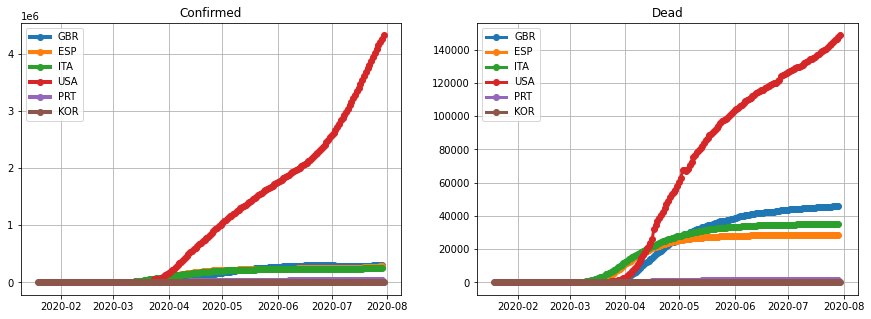

In [3]:
# Choose countries 
my_countries = ['GBR','ESP', 'ITA', 'USA', 'PRT', 'KOR']

df_who = []
for countrycode in my_countries:
    df_who.append(df[(df.countrycode==countrycode) & df['adm_area_1'].isnull()].sort_values(by='date'))
    

## Figure 1: Confirmed and Dead
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(df_who[j].date, df_who[j].confirmed, '-o', linewidth=4.0, label=my_countries[j])
plt.title('Confirmed')
plt.grid()
plt.legend();

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(df_who[j].date, df_who[j].dead, '-o', linewidth=3.0, label=my_countries[j])
plt.title('Dead')
plt.grid()
plt.legend();

## Total deaths (starting with 10 deaths) and Deaths per day (starting with 10 deaths)

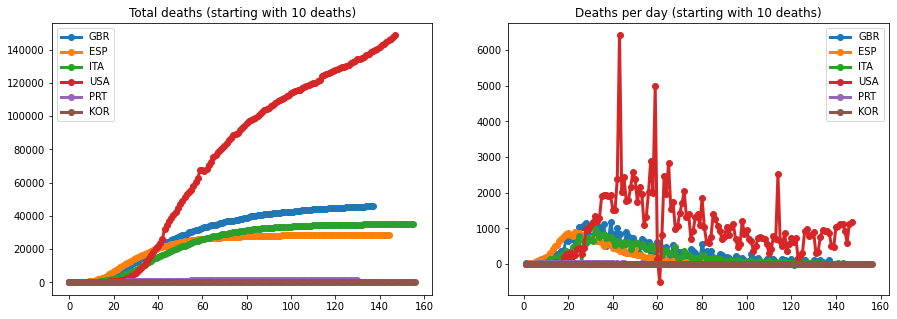

In [4]:
## Figure 2: Total deaths and Deaths per day
plt.figure(figsize=(15,5))
start_with_deaths = 10;
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths],'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Total deaths (starting with 10 deaths)');

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths].diff(),'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Deaths per day (starting with 10 deaths)');

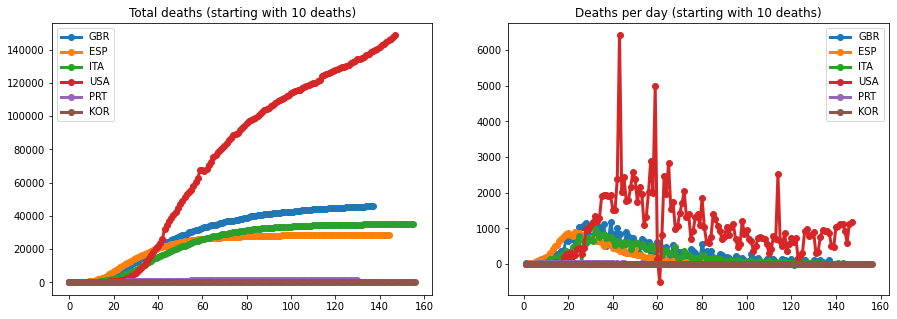

In [5]:
## Figure 2: Total deaths and Deaths per day
plt.figure(figsize=(15,5))
start_with_deaths = 10;
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths],'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Total deaths (starting with 10 deaths)');

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths].diff(),'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Deaths per day (starting with 10 deaths)');